Pima Indians Diabetes Database. for more information [click here](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


# for feature engineering

from sklearn.preprocessing import StandardScaler

from sklearn.compose import make_column_transformer
# for one hot encoding with feature-engine

from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce
from feature_engine import transformation as vt

# for the model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier 


from yellowbrick.classifier import (
    ClassificationReport,
    DiscriminationThreshold,
    PrecisionRecallCurve
)



from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate,KFold, RepeatedKFold

from sklearn.metrics import (precision_recall_curve,
                             PrecisionRecallDisplay)

from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix, 
    ConfusionMatrixDisplay
)

from sklearn.pipeline import Pipeline

In [2]:


pd.set_option('display.max_columns', None)
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', 
                   names=['pregnancy','glucose_level_2hr','Diastolic_BP','skin_fold_thickness','Insulin_2hrs',
                          'BMI','Diabetes_pedigree','Age','diabetes'], header=None)
data.head()

,pregnancy,glucose_level_2hr,Diastolic_BP,skin_fold_thickness,Insulin_2hrs,BMI,Diabetes_pedigree,Age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data analysis
## Tareget analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pregnancy            768 non-null    int64  
 1   glucose_level_2hr    768 non-null    int64  
 2   Diastolic_BP         768 non-null    int64  
 3   skin_fold_thickness  768 non-null    int64  
 4   Insulin_2hrs         768 non-null    int64  
 5   BMI                  768 non-null    float64
 6   Diabetes_pedigree    768 non-null    float64
 7   Age                  768 non-null    int64  
 8   diabetes             768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.diabetes.value_counts(normalize=True)

diabetes
0    0.651042
1    0.348958
Name: proportion, dtype: float64

## Features analysis
### Classifying features according their type

In [5]:
num_var = [var for var in data.columns  if  var!='diabetes']
num_var

['pregnancy',
 'glucose_level_2hr',
 'Diastolic_BP',
 'skin_fold_thickness',
 'Insulin_2hrs',
 'BMI',
 'Diabetes_pedigree',
 'Age']

In [6]:
data[num_var].describe()

,pregnancy,glucose_level_2hr,Diastolic_BP,skin_fold_thickness,Insulin_2hrs,BMI,Diabetes_pedigree,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


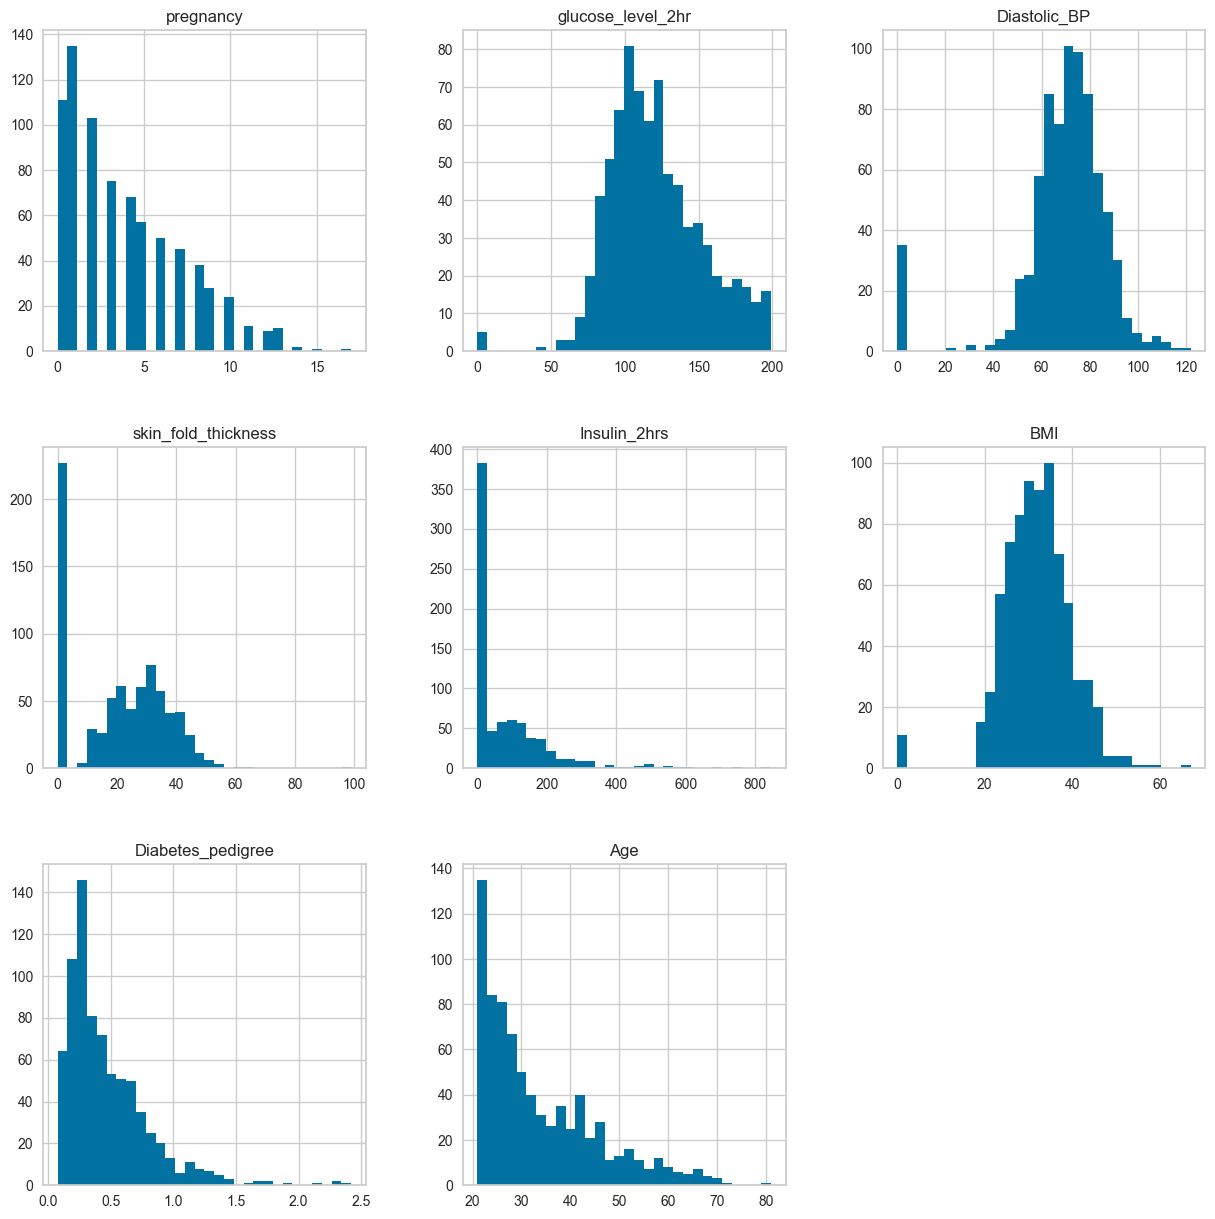

In [7]:
data[num_var].hist(bins=30, figsize=(15,15))
plt.show()

Some variable (glucose_level_2hr, Diastolic_BP, skin_fold_thickness, Insulin_2hr, BMI) have 0 values which within normal range, therefore will be condsdered as missing values. Will replace with 'nan'

In [8]:
var_missing = ['glucose_level_2hr', 'Diastolic_BP', 'skin_fold_thickness', 'Insulin_2hrs', 'BMI']
var_missing

['glucose_level_2hr',
 'Diastolic_BP',
 'skin_fold_thickness',
 'Insulin_2hrs',
 'BMI']

In [9]:
data2 = data.copy()
data2.describe()

,pregnancy,glucose_level_2hr,Diastolic_BP,skin_fold_thickness,Insulin_2hrs,BMI,Diabetes_pedigree,Age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data2[var_missing]=data2[var_missing].replace(0, np.nan)

In [11]:
data2[var_missing] = data2[var_missing].replace({'0':np.nan, 0:np.nan})

In [12]:
data2.describe()


,pregnancy,glucose_level_2hr,Diastolic_BP,skin_fold_thickness,Insulin_2hrs,BMI,Diabetes_pedigree,Age,diabetes
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


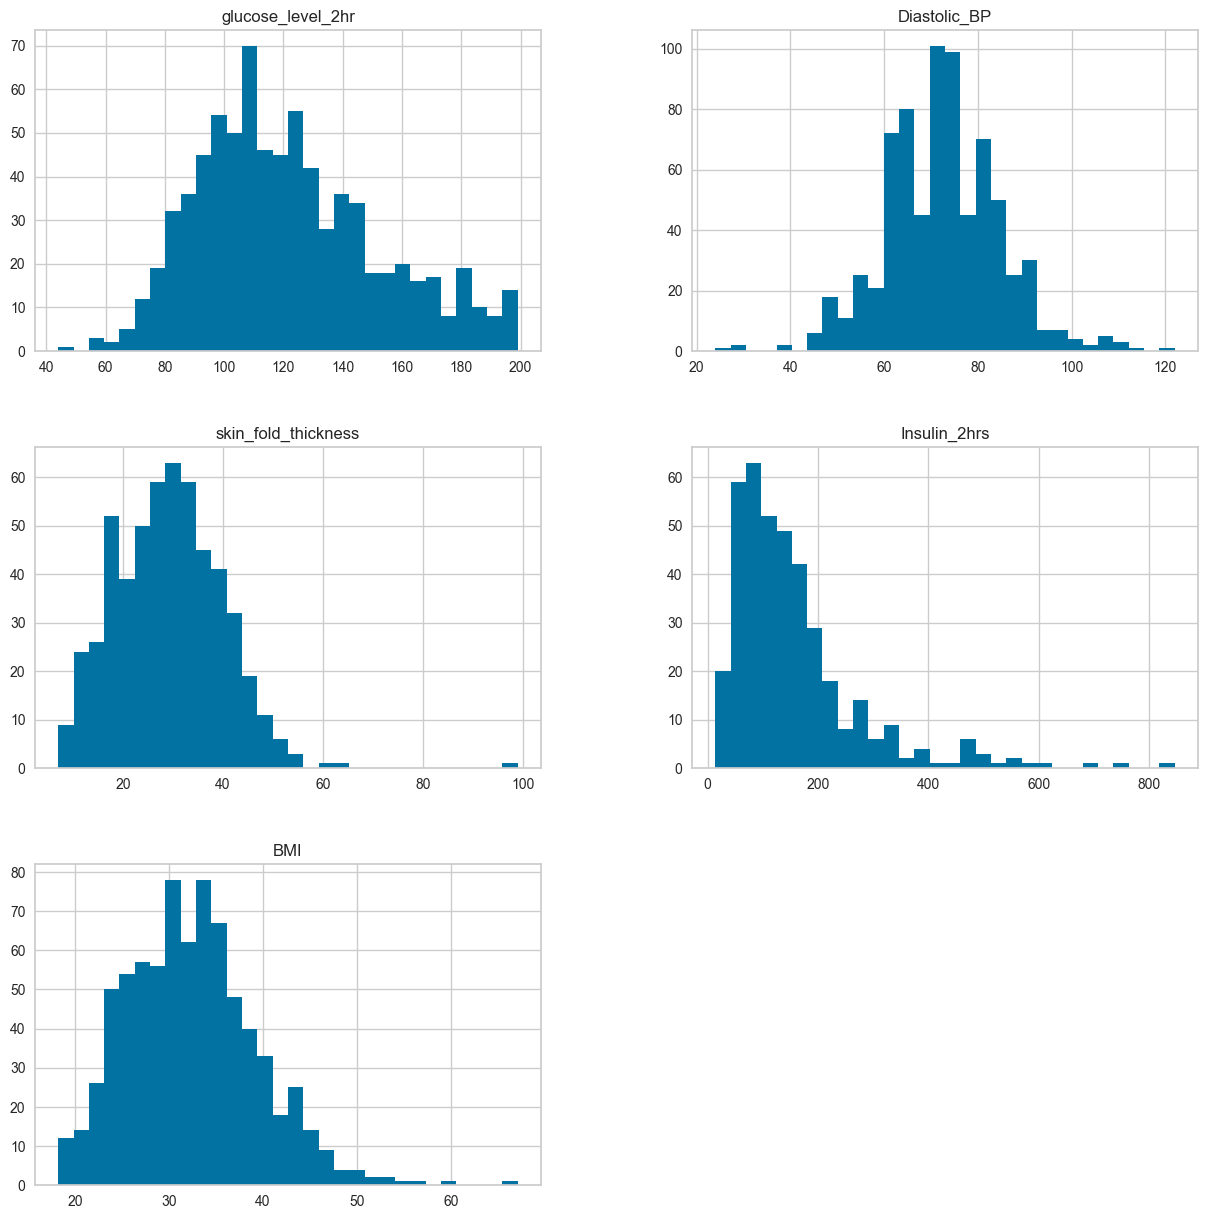

In [13]:
data2[var_missing].hist(bins=30, figsize=(15,15))
plt.show()

Variables 'glucose_level_2hr' and  'Diastolic_BP' look normally distributed and 'nan' values will be imputed with mean.   'skin_fold_thickness', 'Insulin_2hrs', 'BMI' are right skewed therefore will be imputed with median.

In [14]:
mean_ipmute = ['glucose_level_2hr','Diastolic_BP']

In [15]:
median_impute = ['skin_fold_thickness', 'Insulin_2hrs', 'BMI']

# Features  engineering
## Mean and Median imputation

In [16]:
from feature_engine.imputation import MeanMedianImputer

# Mean imputation
mean_imputer = MeanMedianImputer(imputation_method='mean',variables =  mean_ipmute)
mean_imputer.fit(data2)

MeanMedianImputer(imputation_method='mean',
                  variables=['glucose_level_2hr', 'Diastolic_BP'])

In [17]:
mean_imputer.imputer_dict_

{'glucose_level_2hr': 121.6867627785059, 'Diastolic_BP': 72.40518417462484}

In [18]:
data2 = mean_imputer.transform(data2)

In [19]:
# Median imputation
median_imputer = MeanMedianImputer(imputation_method='median',variables =  median_impute)
median_imputer.fit(data2)

MeanMedianImputer(variables=['skin_fold_thickness', 'Insulin_2hrs', 'BMI'])

In [20]:
median_imputer.imputer_dict_

{'skin_fold_thickness': 29.0, 'Insulin_2hrs': 125.0, 'BMI': 32.3}

In [21]:
data2 = median_imputer.transform(data2)

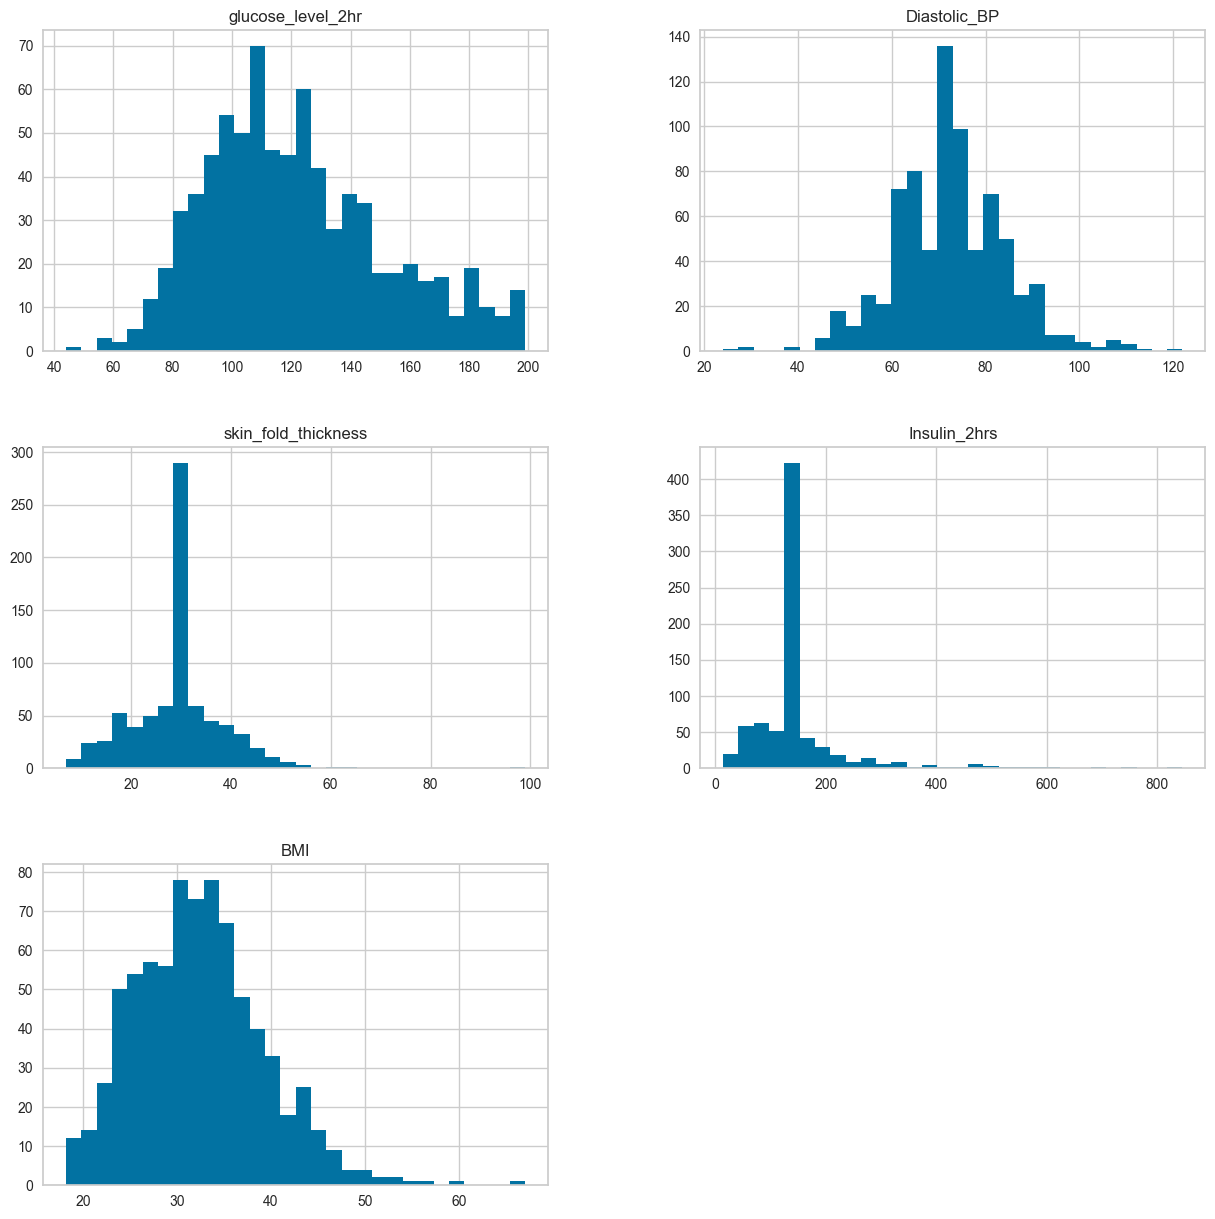

In [22]:
data2[var_missing].hist(bins=30, figsize=(15,15))
plt.show()

In [23]:
data3 = data2.copy()

In [24]:
median_impute

['skin_fold_thickness', 'Insulin_2hrs', 'BMI']

## Data tansformation
Transfrom variables that were median imputed as they show right skewness

In [25]:
import feature_engine.transformation as vt

In [26]:
lt = vt.LogTransformer(variables = median_impute)

lt.fit(data3)

LogTransformer(variables=['skin_fold_thickness', 'Insulin_2hrs', 'BMI'])

In [27]:
data3 = lt.transform(data3)

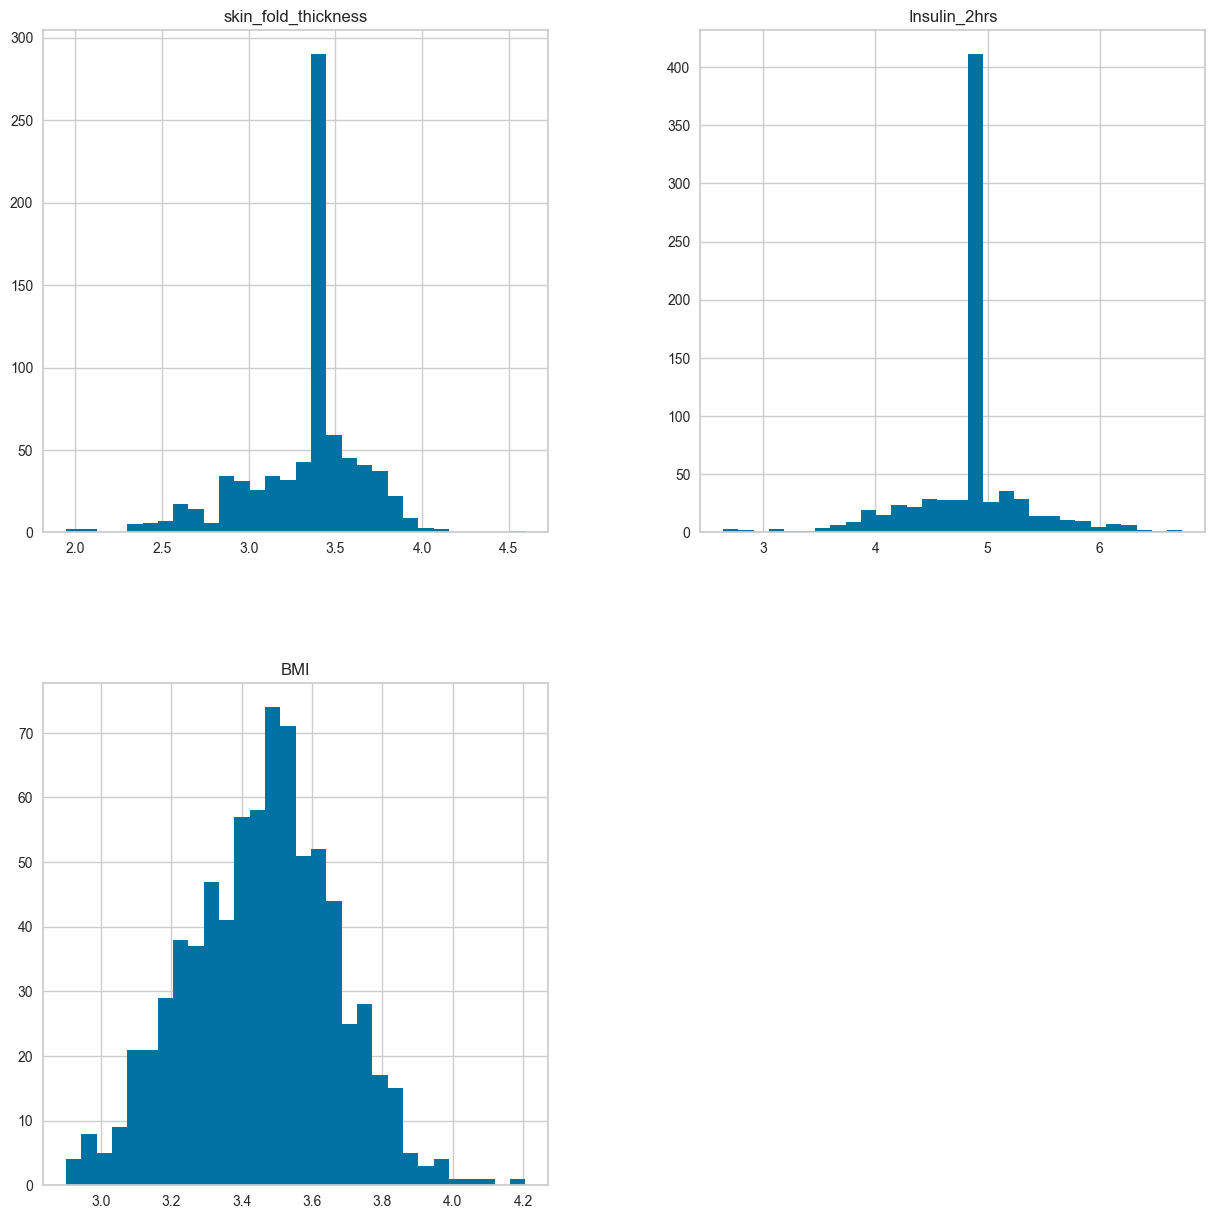

In [28]:
data3[median_impute].hist(bins=30, figsize=(15,15))
plt.show()

## Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

stand_scaler = ColumnTransformer(
    transformers=[
        ("stand", StandardScaler(), num_var)],remainder="passthrough",
    
)

In [30]:
stand_scaler.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('stand', StandardScaler(),
                                 ['pregnancy', 'glucose_level_2hr',
                                  'Diastolic_BP', 'skin_fold_thickness',
                                  'Insulin_2hrs', 'BMI', 'Diabetes_pedigree',
                                  'Age'])])

In [31]:
stand_scaler.fit(data3)

ColumnTransformer(remainder='passthrough',
                  transformers=[('stand', StandardScaler(),
                                 ['pregnancy', 'glucose_level_2hr',
                                  'Diastolic_BP', 'skin_fold_thickness',
                                  'Insulin_2hrs', 'BMI', 'Diabetes_pedigree',
                                  'Age'])])

In [32]:
stand_scaler.transformers

[('stand',
  StandardScaler(),
  ['pregnancy',
   'glucose_level_2hr',
   'Diastolic_BP',
   'skin_fold_thickness',
   'Insulin_2hrs',
   'BMI',
   'Diabetes_pedigree',
   'Age'])]

In [33]:
data3 = stand_scaler.transform(data3)

In [34]:
data3.head()

,stand__pregnancy,stand__glucose_level_2hr,stand__Diastolic_BP,stand__skin_fold_thickness,stand__Insulin_2hrs,stand__BMI,stand__Diabetes_pedigree,stand__Age,remainder__diabetes
0,0.639947,0.865108,-0.033518,0.712746,0.020801,0.269439,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,0.138720,0.020801,-0.839379,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,0.138720,0.020801,-1.468070,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-0.568850,-0.549172,-0.579002,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,0.712746,0.612034,1.451265,5.484909,-0.020496,1


In [35]:
data[var_missing] = data[var_missing].replace({'0':np.nan, 0:np.nan})

In [36]:
data2.describe()

,pregnancy,glucose_level_2hr,Diastolic_BP,skin_fold_thickness,Insulin_2hrs,BMI,Diabetes_pedigree,Age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Assembling pipeline

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['diabetes'], axis=1),  # drop the target
    data['diabetes'],  # just the target
    test_size=0.30,
    random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((537, 8), (537,), (231, 8), (231,))

In [38]:
pipe = Pipeline ([('mean_imputation',mean_imputer),
                         ('median_imputation', median_imputer),
                         ('log_trans',lt),
                         ('stand_scale', stand_scaler),])

In [39]:
# train the pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('mean_imputation',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['glucose_level_2hr',
                                              'Diastolic_BP'])),
                ('median_imputation',
                 MeanMedianImputer(variables=['skin_fold_thickness',
                                              'Insulin_2hrs', 'BMI'])),
                ('log_trans',
                 LogTransformer(variables=['skin_fold_thickness',
                                           'Insulin_2hrs', 'BMI'])),
                ('stand_scale',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stand', StandardScaler(),
                                                  ['pregnancy',
                                                   'glucose_level_2hr',
                                                   'Diastolic_BP',
                                                   'skin_fold_thickness',
                                                   'Insulin_2hrs', 'BMI',
                                                   'Diabetes_pedigree',
                                                   'Age'])]))])

In [40]:
#transform datasets
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [41]:
# check absence of na in the train set
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

In [42]:
# check absence of na in the test set
[var for var in X_test.columns if X_test[var].isnull().sum() > 0]

[]

In [43]:
# the parameters are learnt and stored in each step
# of the pipeline

pipe.named_steps['mean_imputation'].imputer_dict_

{'glucose_level_2hr': 122.45590994371481, 'Diastolic_BP': 73.068359375}

In [44]:
X_train.head()

,stand__pregnancy,stand__glucose_level_2hr,stand__Diastolic_BP,stand__skin_fold_thickness,stand__Insulin_2hrs,stand__BMI,stand__Diabetes_pedigree,stand__Age
580,-1.133115,0.937627,1.424946,1.536073,0.019004,1.290905,-0.300272,-1.056545
418,-0.839162,-1.296062,-0.426547,0.119604,0.019004,-2.662041,0.456991,-0.556223
764,-0.545209,-0.014976,-0.258229,-0.099796,0.019004,0.656691,-0.393059,-0.556223
363,0.042697,0.773385,0.415041,0.119604,0.019004,0.869559,0.145705,2.779253
757,-1.133115,0.017872,-0.089912,0.119604,0.019004,0.592209,-0.638496,1.528450


# HyperParameters Optimization

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['diabetes'], axis=1),  # drop the target
    data['diabetes'],  # just the target
    test_size=0.30,
    random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

pipe = Pipeline ([('mean_imputation',mean_imputer),
                         ('median_imputation', median_imputer),
                         ('log_trans',lt),
                         ('stand_scale', stand_scaler),])
#transform datasets
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

## LogisticRegression

In [46]:
# Dictionary to save models performance
roc_train = {}
roc_test = {}

In [47]:
# Logistic Regression
logit = LogisticRegression(
    penalty ='l2', C=1, solver='liblinear', random_state=4, max_iter=10000)

# hyperparameter space
param_grid = dict(
    penalty=['l1', 'l2'],
    C=[0.1, 1, 10],
)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=4)

# search
clf =  GridSearchCV(
    logit,
    param_grid,
    scoring='roc_auc',
    cv=kf, # k-fold
    refit=True, # refits best model to entire dataset
)

search = clf.fit(X_train, y_train)

# best hyperparameters
search.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [48]:
# let's get the predictions
train_preds = search.predict_proba(X_train)
test_preds = search.predict_proba(X_test)


print('Best Parameters: ',search.best_params_)
print()
print('Train roc_auc: ', roc_auc_score(y_train, (train_preds[:,1])))
print('Test roc_auc: ', roc_auc_score(y_test, test_preds[:,1]))


roc_test["LogisticRegression"] = roc_auc_score(y_test, test_preds[:,1])
roc_train["LogisticRegression"] = roc_auc_score(y_train, train_preds[:,1])

Best Parameters:  {'C': 0.1, 'penalty': 'l2'}

Train roc_auc:  0.8487421478164168
Test roc_auc:  0.8375796178343949


## GradientBoosting

In [49]:
gbm = GradientBoostingClassifier(random_state=0, max_depth = 4,min_samples_split = 0.3,n_estimators = 10)


In [50]:
# set up the model
gbm = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
param_grid = dict(
    n_estimators=[10, 20, 50, 100],
    min_samples_split=[0.1, 0.3, 0.5],
    max_depth=[1,2,3,4,None],
    )


# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=4)

# search
clf =  GridSearchCV(
    gbm,
    param_grid,
    scoring='roc_auc',
    cv=kf, # k-fold
    refit=True, # refits best model to entire dataset
)

search = clf.fit(X_train, y_train)

# best hyperparameters
search.best_params_

{'max_depth': 4, 'min_samples_split': 0.3, 'n_estimators': 10}

In [51]:
# let's get the predictions
train_preds = search.predict_proba(X_train)
test_preds = search.predict_proba(X_test)


print('Best Parameters: ',search.best_params_)
print()
print('Train roc_auc: ', roc_auc_score(y_train, (train_preds[:,1])))
print('Test roc_auc: ', roc_auc_score(y_test, test_preds[:,1]))


roc_test["GradientBoosting"] = roc_auc_score(y_test, test_preds[:,1])
roc_train["GradientBoosting"] = roc_auc_score(y_train, train_preds[:,1])

Best Parameters:  {'max_depth': 4, 'min_samples_split': 0.3, 'n_estimators': 10}

Train roc_auc:  0.8910612846022061
Test roc_auc:  0.8320709244276123


## svm

In [52]:
# set up the model
svm = SVC(random_state=0, probability=True)

# determine the hyperparameter space
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']},
 ]


# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=4)

# search
clf =  GridSearchCV(
    svm,
    param_grid,
    scoring='roc_auc',
    cv=kf, # k-fold
    refit=True, # refits best model to entire dataset
)

search = clf.fit(X_train, y_train)

# best hyperparameters
search.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [53]:
# let's get the predictions
train_preds = search.predict_proba(X_train)
test_preds = search.predict_proba(X_test)


print('Best Parameters: ',search.best_params_)
print()
print('Train roc_auc: ', roc_auc_score(y_train, (train_preds[:,1])))
print('Test roc_auc: ', roc_auc_score(y_test, test_preds[:,1]))




roc_test["SupportVectorClassifier"] = roc_auc_score(y_test, test_preds[:,1])
roc_train["SupportVectorClassifier"] = roc_auc_score(y_train, train_preds[:,1])

Best Parameters:  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Train roc_auc:  0.8490427098674521
Test roc_auc:  0.8343088311241177


## RF

In [54]:
rf = RandomForestClassifier()

param_grid = { 
    'n_estimators': [400, 500,700,800],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=4)

# search
clf =  GridSearchCV(
    rf,
    param_grid,
    scoring='roc_auc',
    cv=kf, # k-fold
    refit=True, # refits best model to entire dataset
)

search = clf.fit(X_train, y_train)

# best hyperparameters
search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'n_estimators': 700}

In [55]:
# let's get the predictions
train_preds = search.predict_proba(X_train)
test_preds = search.predict_proba(X_test)


print('Best Parameters: ',search.best_params_)
print()
print('Train roc_auc: ', roc_auc_score(y_train, (train_preds[:,1])))
print('Test roc_auc: ', roc_auc_score(y_test, test_preds[:,1]))

roc_test["RandomForest"] = roc_auc_score(y_test, test_preds[:,1])
roc_train["RandomForest"] = roc_auc_score(y_train, train_preds[:,1])

Best Parameters:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 700}

Train roc_auc:  0.9147305461212467
Test roc_auc:  0.8394732311929765


## KNN

In [56]:
knn = KNeighborsClassifier()

param_grid = { 
    'n_neighbors': [1,2,3,4,5,6,7,8],
    'weights': ['uniform', 'distance'],
    'metric' :['euclidean', 'manhattan']
}

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=4)

# search
clf =  GridSearchCV(
    knn,
    param_grid,
    scoring='roc_auc',
    cv=kf, # k-fold
    refit=True, # refits best model to entire dataset
)

search = clf.fit(X_train, y_train)

# best hyperparameters
search.best_params_

{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}

In [57]:
# let's get the predictions
train_preds = search.predict_proba(X_train)
test_preds = search.predict_proba(X_test)

print('Best Parameters: ',search.best_params_)
print()
print('Train roc_auc: ', roc_auc_score(y_train, (train_preds[:,1])))
print('Test roc_auc: ', roc_auc_score(y_test, test_preds[:,1]))

roc_test["KNeighbors"] = roc_auc_score(y_test, test_preds[:,1])
roc_train["KNeighbors"] = roc_auc_score(y_train, train_preds[:,1])

Best Parameters:  {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}

Train roc_auc:  0.8917676054221394
Test roc_auc:  0.81954725426063


In [58]:
roc_test

{'LogisticRegression': 0.8375796178343949,
 'GradientBoosting': 0.8320709244276123,
 'SupportVectorClassifier': 0.8343088311241177,
 'RandomForest': 0.8394732311929765,
 'KNeighbors': 0.81954725426063}

In [59]:
roc_train

{'LogisticRegression': 0.8487421478164168,
 'GradientBoosting': 0.8910612846022061,
 'SupportVectorClassifier': 0.8490427098674521,
 'RandomForest': 0.9147305461212467,
 'KNeighbors': 0.8917676054221394}

In [60]:
# Convert dic to dataframe
test = pd.DataFrame.from_dict(roc_test, orient='index',
                       columns=['roc_auc_test'])
#test

In [61]:
# Convert dic to dataframe
train = pd.DataFrame.from_dict(roc_train, orient='index',
                       columns=['roc_auc_train'])
#train

In [62]:
# merge test and train scores
scores = test.merge(train,left_index=True, right_index=True)
scores

,roc_auc_test,roc_auc_train
LogisticRegression,0.837580,0.848742
GradientBoosting,0.832071,0.891061
SupportVectorClassifier,0.834309,0.849043
RandomForest,0.839473,0.914731
KNeighbors,0.819547,0.891768


It seems that apart from 'KNeighbors', all algorithms' give comparable scores on test data. Looking at train data result, 'LogisticRegression' and 'SupportVectorClassifier' showd less overfitting as scores obtained from train and test data are closer.

In following cells performance of 'LogisticRegression' and 'SupportVectorClassifier' will be checked and compared.

# Performance Evaluation using Confusion_matrix and ClassificationReport


## LogisticRegression

In [63]:
logit = LogisticRegression(
    penalty ='l2', C=1, solver='liblinear', random_state=4, max_iter=10000)


logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

confusion_matrix(y_test, y_pred, labels=[0,1])

array([[141,  16],
       [ 38,  36]])

/Users/mwlodghareeb/anaconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


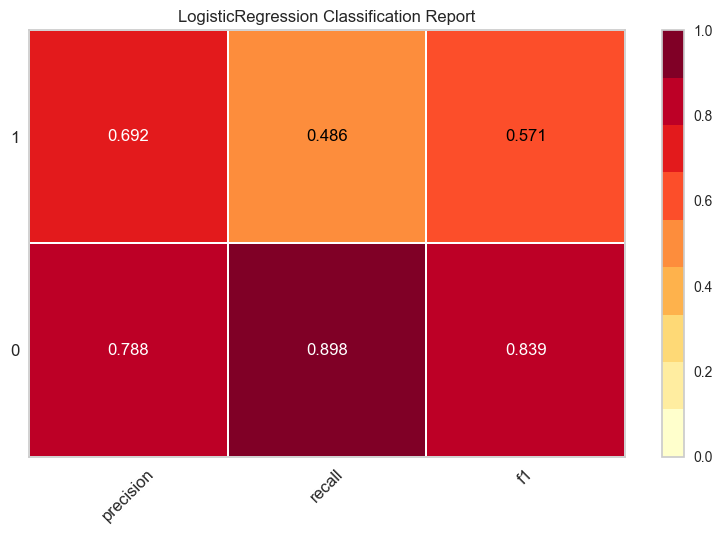

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [64]:

visualizer = ClassificationReport(logit)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

## smv


In [65]:
svm = SVC(random_state=0,C= 10,  kernel= 'rbf', gamma = 0.001 )

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

confusion_matrix(y_test, y_pred, labels=[0,1])

array([[143,  14],
       [ 39,  35]])

/Users/mwlodghareeb/anaconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


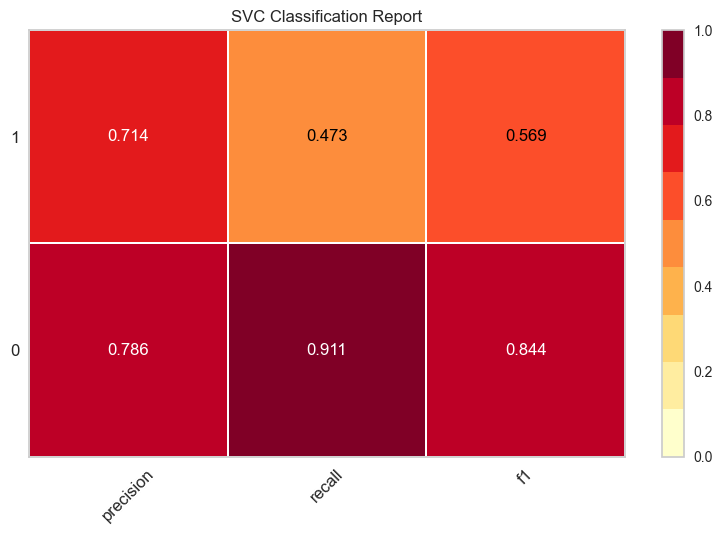

<Axes: title={'center': 'SVC Classification Report'}>

In [66]:

visualizer = ClassificationReport(svm)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

Looking at confusion_matrix results and f1 score and recall of minority class both models have comparable performance. 

The cost of miss-identificatin of people being diabetic (False Negative) far more higher than classifying healthy people being at risk of diabetes (False Positive). Therefore "Recall" is the metric to optimise. Will continue using Logistic Regression.

# Optimizing Recall

Plotting the precision-Recall curve for finding the **optimal threshold** Will continue using Logistic Regression.


In [67]:
# calculate and plot the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, logit.predict_proba(X_test)[:, 1])


In [68]:
## obtaing thresholds
df_recall_precision = pd.DataFrame({'Precision':precision[:-1],
                                    'Recall':recall[:-1],
                                    'Threshold':thresholds})
df_recall_precision.head()

,Precision,Recall,Threshold
0,0.320346,1.0,0.011243
1,0.321739,1.0,0.013913
2,0.323144,1.0,0.015963
3,0.324561,1.0,0.018294
4,0.325991,1.0,0.019304


In [69]:
# Calculate the f-score
fscore = (2 * precision * recall) / (precision + recall)
#fscore

In [70]:
# Find the optimal threshold
index = np.argmax(fscore)
thresholdOpt = round(thresholds[index], ndigits = 4)
fscoreOpt = round(fscore[index], ndigits = 4)
recallOpt = round(recall[index], ndigits = 4)
precisionOpt = round(precision[index], ndigits = 4)
print('Best Threshold: {} with F-Score: {}'.format(thresholdOpt, fscoreOpt))
print('Recall: {}, Precision: {}'.format(recallOpt, precisionOpt))

Best Threshold: 0.2177 with F-Score: 0.6667
Recall: 0.8784, Precision: 0.5372


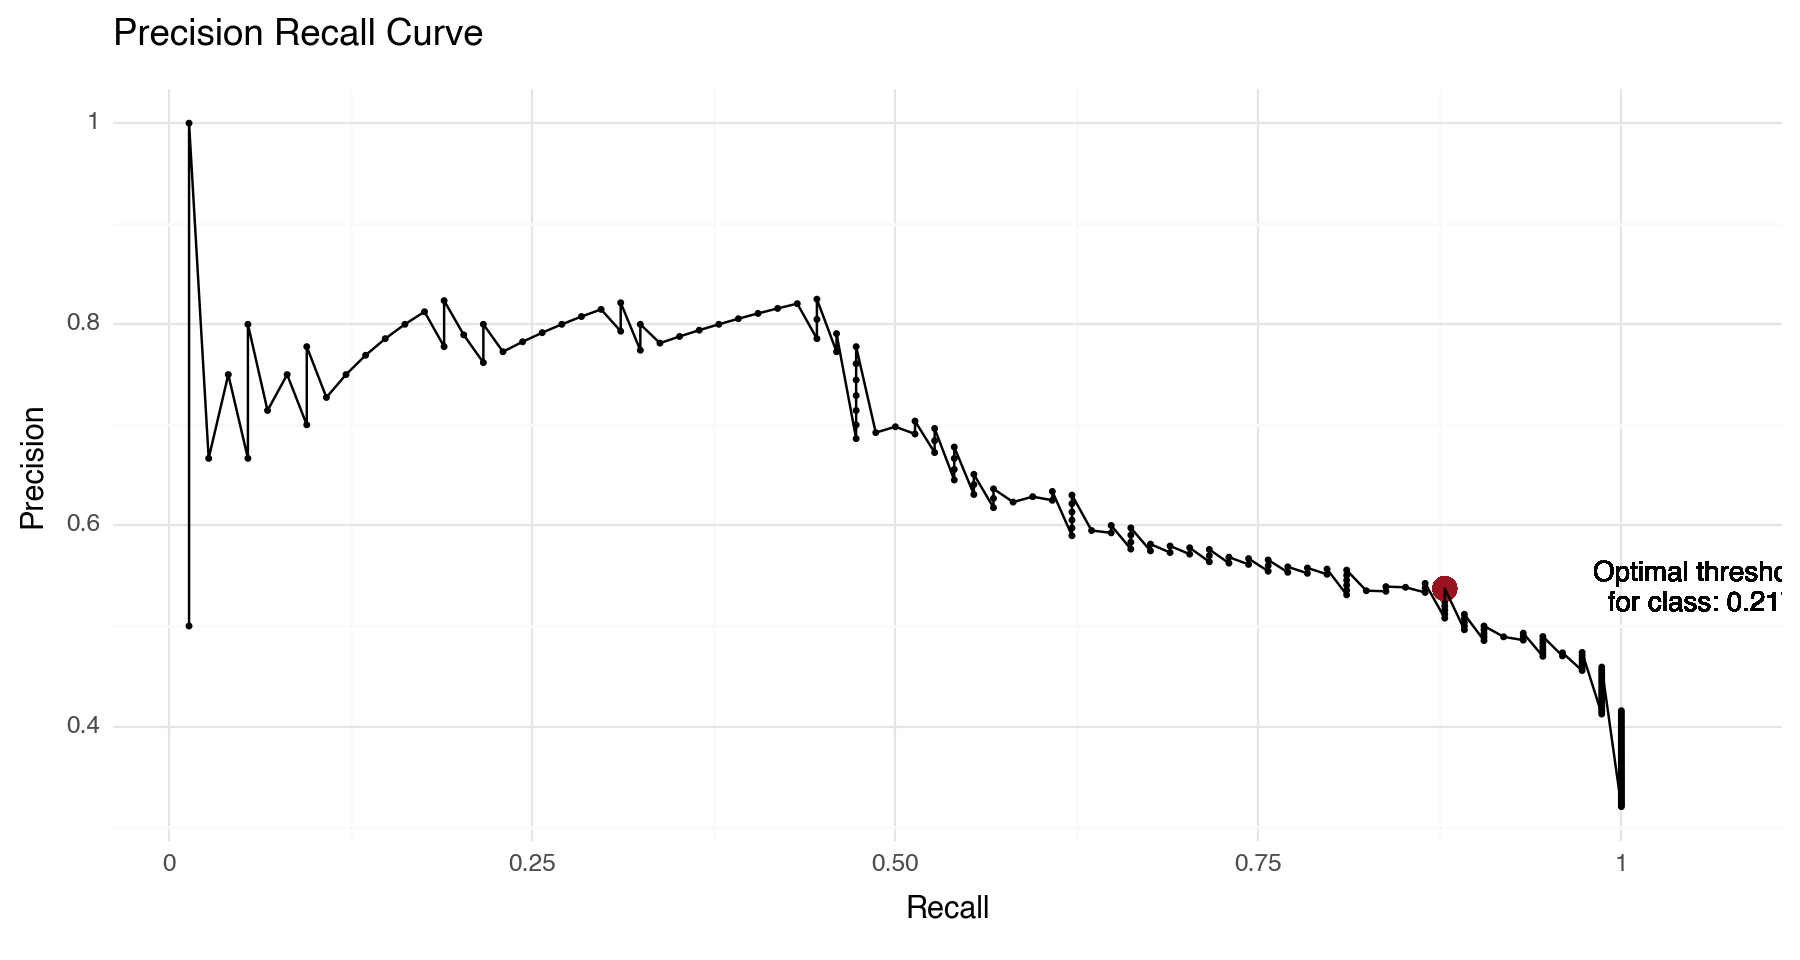

<Figure Size: (900 x 480)>

In [71]:
# Plotting

from plotnine import *
import plotnine


plotnine.options.figure_size = (9, 4.8)
(
    ggplot(data = df_recall_precision)+
    geom_point(aes(x = 'Recall',
                   y = 'Precision'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = recallOpt,
                   y = precisionOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'Recall',
                  y = 'Precision'))+
    # Annotate the text
    geom_text(aes(x = recallOpt,
                  y = precisionOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.18,
              nudge_y = 0,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'Precision Recall Curve')+
    xlab('Recall')+
    ylab('Precision')+
    theme_minimal()
)


## Applying threshold

### Applying defeault threshold (0.5)

In [72]:
# Returns a dataframe with classification metrics and confusion matrix values
def make_classification_score(y_test, predictions, modelName):
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel() # ravel() used to convert to a 1-D array
    prec=precision_score(y_test, predictions)
    rec=recall_score(y_test, predictions)
    f1=f1_score(y_test, predictions)
    acc=accuracy_score(y_test, predictions)
    # specificity
    spec=tn/(tn+fp)

    score = {'Model': [modelName], 'Accuracy': [acc], 'f1': [f1], 'Recall': [rec], 'Precision': [prec], \
        'Specificity': [spec], 'TP': [tp], 'TN': [tn], 'FP': [fp], 'FN': [fn], 'y_test size': [len(y_test)]}
    df_score = pd.DataFrame(data=score)
    return df_score

In [73]:
# from probability to class value
def probs_to_prediction(probs, threshold):
    pred=[]
    for x in probs[:,1]:
        if x>threshold:
            pred.append(1)
        else:
            pred.append(0)
    return pred

In [74]:
# table for ou
predictions = probs_to_prediction(logit.predict_proba(X_test), 0.5)
make_classification_score(y_test, predictions, "logit")


,Model,Accuracy,f1,Recall,Precision,Specificity,TP,TN,FP,FN,y_test size
0,logit,0.766234,0.571429,0.486486,0.692308,0.898089,36,141,16,38,231


### Applying calcultaed threshold

In [75]:
predictions = probs_to_prediction(logit.predict_proba(X_test), 0.21)
make_classification_score(y_test, predictions, "logit")


,Model,Accuracy,f1,Recall,Precision,Specificity,TP,TN,FP,FN,y_test size
0,logit,0.701299,0.653266,0.878378,0.52,0.617834,65,97,60,9,231


Applying the optimal calcultated Threshold (0.21):
- incresed the recall to 0.87 from 0.48 and decreased False negative from 38 to 9.
